In [ ]:
pip install wordcloud

In [ ]:
pip install xlrd

In [ ]:
pip install pyarrow

In [ ]:
pip install wurlitzer

In [ ]:
pip install scikit-posthocs

In [ ]:
pip install statannotations

In [ ]:
pip install tensorflow

In [ ]:
pip install keras.preprocessing

In [ ]:
pip install Keras-Preprocessing

In [270]:
# Required modules and libraries
import pandas as pd
import numpy as np
import pyarrow.parquet as pa
import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#from scikitplot.metrics import plot_confusion_matrix, plot_roc
import tensorflow as tf
from keras import preprocessing 
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import time
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing.sequence import pad_sequences
#from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    analyzer=None
)

In [272]:
"""Loading this dataset that contains information in excel format which comprises around 
7489 data from social media, Facebook comments, etc."""
# label 0 : Normal
# label 1: Anxiety/depression
df = pd.read_excel('Depression_Text.xlsx')
df.head()

,text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age


In [273]:
df.label.value_counts()

0.0    6259
1.0    1227
Name: label, dtype: int64

In [172]:
"""Some features include readability indices such as Automated Readability Index (ARI), Coleman Liau Index, 
and Flesch-Kincaid Grade Level, as well as sentiment analysis scores like sentiment compound, 
negative, neutral, and positive scores. """
df2=pd.read_csv("healthanxiety_dataset.csv")
df2.head()

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,healthanxiety,Nomis176,1/1/2018,"Final doctor appointment tomorrow, tired of co...",9.137909,7.282428,8.616061,72.474091,61.090909,11.345455,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.055919
1,healthanxiety,psychstudent317,1/1/2018,Anyone have bone or muscle pain that was stres...,4.399892,7.131386,3.665806,87.185376,74.161290,5.423656,...,0.0,0.0,0.0,0.000000,0.290466,0.0,0.0,0.000000,0.0,0.000000
2,healthanxiety,bulk_barn,1/1/2018,Listening to your body? I'm curious how those ...,3.590660,4.930895,4.605802,85.640967,72.584906,7.564151,...,0.0,0.0,0.0,0.110757,0.000000,0.0,0.0,0.332673,0.0,0.000000
3,healthanxiety,AutoModerator,1/1/2018,Weekly /r/HealthAnxiety Challenge - Exercise A...,4.515682,7.033342,5.059091,78.383636,72.863636,8.945455,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,healthanxiety,parthkhurana7,1/1/2018,This is killing me So i had a bacterial stomac...,3.034388,5.356252,3.977494,85.306958,76.721519,7.757637,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [173]:
df3=pd.read_csv("bipolar_dataset.csv", sep=';')
df3.head()

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,bipolarreddit,TanagerOffTrack,01/01/2018,What birth control are you on? I tried an IUD ...,"1,02695E+16","3,51772E+16","3,31905E+14","8,577E+15","8,6807E+15","6,06416E+15",...,0,0,0,0,0,0,"1,52812E+16",0,0,0
1,bipolarreddit,DuplicitousSnake,01/01/2018,Hypersexuality I was diagnosed with bipolar un...,"6,12041E+15","5,77249E+16","7,65747E+15","7,20244E+15","6,62671E+15","1,01369E+16",...,0,0,0,"1,37462E+16",0,0,0,0,0,"1,21593E+16"
2,bipolarreddit,dearangelou,01/01/2018,Meditation I have been using the free meditati...,18515625,"4,57143E+16","4,12375E+15","7,97463E+15",855625,695,...,0,0,0,0,0,0,"2,85224E+15",0,0,"2,58562E+16"
3,bipolarreddit,dootdoopdooq,01/01/2018,Family question diagnosis - vent Start with th...,"7,6667E+15","3,18105E+15","2,47623E+16","9,19278E+14","8,71379E+15","5,58187E+15",...,0,0,0,"5,75892E+14",0,0,0,"8,64887E+15",0,0
4,bipolarreddit,lemonyellow3,01/01/2018,Unable to stop talking to myself- any ideas/ex...,"3,66308E+16","6,748E+15","4,8363E+15","7,54472E+15","8,01828E+15","7,68289E+15",...,0,0,0,0,0,0,0,0,0,0


In [174]:
df4 = pd.read_parquet('train.parquet') 
df4.head()

,Context,Knowledge,Response
0,Hi,greeting,Hello there. Tell me how are you feeling today?
1,Hi,greeting,Hi there. What brings you here today?
2,Hi,greeting,Hi there. How are you feeling today?
3,Hi,greeting,Great to see you. How do you feel currently?
4,Hi,greeting,Hello there. Glad to see you're back. What's g...


In [175]:
df5=pd.read_csv("mental_health.csv")
df5.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [176]:
df6=pd.read_csv("therapist.csv")
df6.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [274]:
# Show diagnoses and counts
df['label'].value_counts()

0.0    6259
1.0    1227
Name: label, dtype: int64

In [275]:
df.isnull().sum()
df.dropna(inplace=True)

In [276]:
df['label'].value_counts()

0.0    6252
1.0    1224
Name: label, dtype: int64

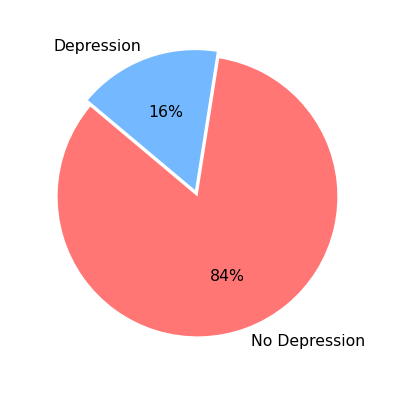

In [277]:
labels = ['No Depression', 'Depression']
#sizes = [4090, 3298]
#labels =df.label.unique()
sizes = df.label.value_counts()
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(7, 2), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 5}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

#plt.subplot(1, 2, 2)
#sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), data=df)

plt.show()

In [181]:
print(f"Summary of The  Dataset :")
df.describe().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

Summary of The  Dataset :


,count,mean,std,min,25%,50%,75%,max
label,7476.000000,0.163724,0.370050,0.000000,0.000000,0.000000,0.000000,1.000000
Age,7476.000000,15.379213,1.057790,13.000000,14.000000,15.000000,16.000000,17.000000


In [182]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

,count,unique,top,freq
text,7476,7370,ni-ki best boy,11
Gender,7476,2,Male,4053
Age Category,7476,2,Young Age,3968


Text(0, 0.5, 'Freq')

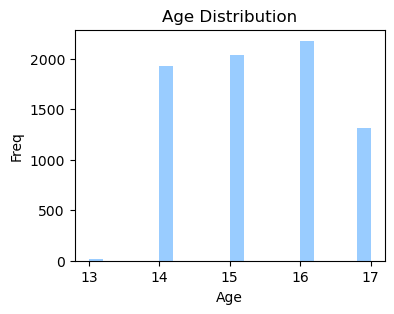

In [183]:
fig,ax = plt.subplots(figsize=(4,3))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#0080ff')
plt.title('Age Distribution')
plt.ylabel('Freq')


Glimpse of Relation Between Label and Gender Group of Students :


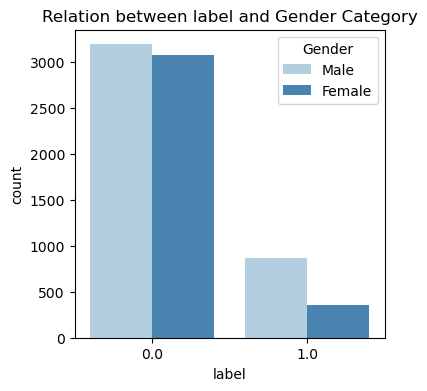

In [281]:
print(f"\nGlimpse of Relation Between Label and Gender Group of Students :")
plt.figure(figsize=(4, 4))
sns.countplot(x='label', hue='Gender', data=df, palette='Blues')
plt.title('Relation between label and Gender Category')
plt.show()


Glimpse of The Age of Students :


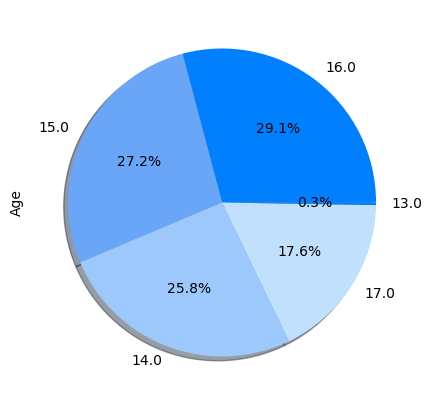

In [184]:
print(f"\nGlimpse of The Age of Students :")
df['Age'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(5,5), colors=['#0080ff','#6aa6f8','#9dc8fb','#c1e0fd'])
plt.show()


Glimpse of Relation Between Label and Age Group of Students :


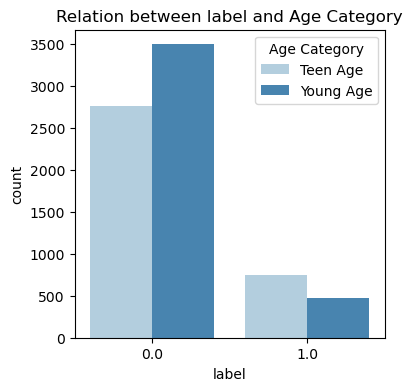

In [185]:
print(f"\nGlimpse of Relation Between Label and Age Group of Students :")
plt.figure(figsize=(4, 4))
sns.countplot(x='label', hue='Age Category', data=df, palette='Blues')
plt.title('Relation between label and Age Category')
plt.show()

In [186]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup


In [71]:
pip install spacy

python(80068) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 27.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.0/133.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.0/490.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.7/863.7 kB 21.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 38.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 33.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 7.4 MB/s eta 0:00:00
Note: you may need t

In [187]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/bhavika/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [188]:
  df['label'].value_counts()

0.0    6252
1.0    1224
Name: label, dtype: int64

1.Text preprocessing

In [189]:
def convert_lowercase(text):
    text = text.lower()
    return text

df['text'] = df['text'].apply(convert_lowercase)

2.Removing URLs

In [190]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['text'] = df['text'].apply(remove_url)

3. Removing Punctutaions

In [191]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['text'] = df['text'].apply(remove_punc)

4. Removing Stopwords

In [192]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df['text'] = df['text'].apply(remove_stopwords)

5. Stemming

In [193]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df['text'] = df['text'].apply(perform_stemming)

In [194]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

df['clean']=df['text'].map(lambda s:preprocess(s))


In [74]:
pip install lxml

python(80221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.



Glimpse of Student Text WordCloud :


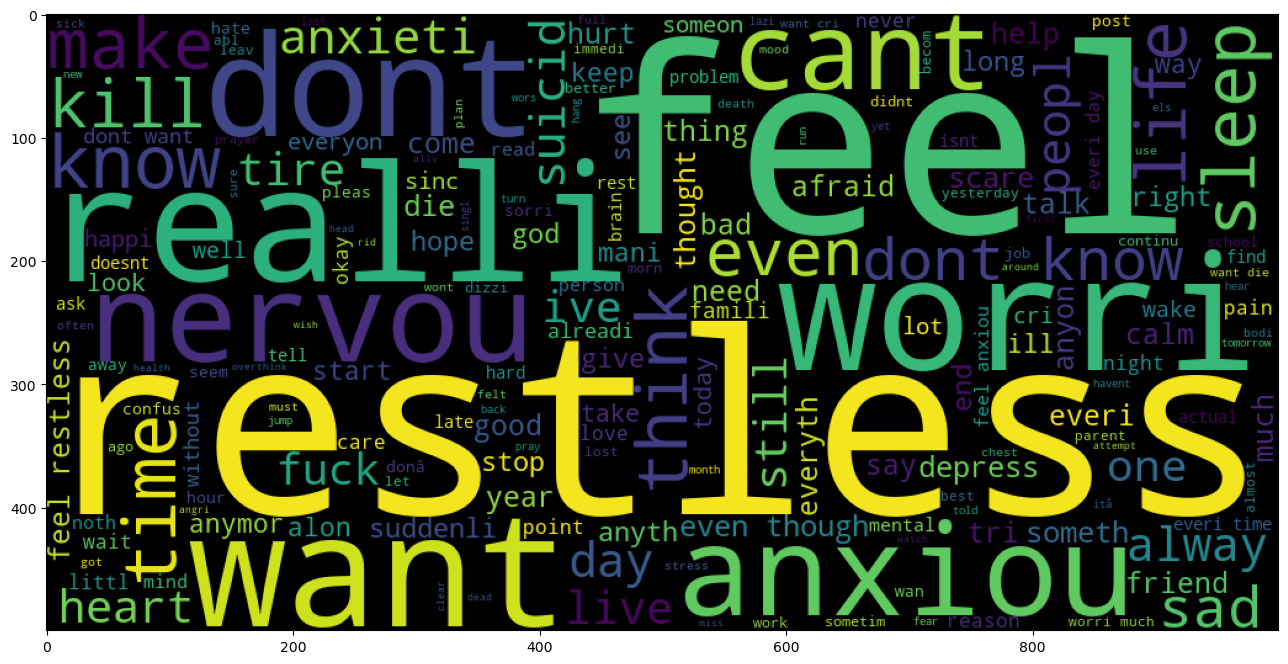

In [195]:
print(f"\nGlimpse of Student Text WordCloud :")

from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
df1=df[df['label']==1]
for row in df1['clean']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [199]:
#tf=TfidfVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english',max_features=2500)
#data_vec = tf.fit_transform(df['text']).toarray()
vectorizer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english',max_features=2500)
# tokenize and build vocab
vectorizer.fit(df['clean'])
# summarize
vocab = vectorizer.vocabulary_
data_vec = vectorizer.transform(df['clean'])
data_vec=data_vec.toarray()
data_vec.shape

(7476, 2500)

In [200]:
from sklearn.metrics.pairwise import cosine_similarity
cosine=cosine_similarity(data_vec, data_vec)
cosine.shape

(7476, 7476)

In [201]:
data_vec = data_vec.reshape(7476,2500)
cosine = cosine.reshape(7476,7476)
X=np.concatenate([cosine,data_vec], axis=1)


In [202]:
Y=df.label

NAIVE BAYES

In [203]:
from sklearn import model_selection
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 0)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
clf = MultinomialNB()
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(x_test)

train_score = clf.score(X_train_resampled, y_train_resampled)
test_score = clf.score(x_test, y_test)

print(test_score)

0.9058319957196361


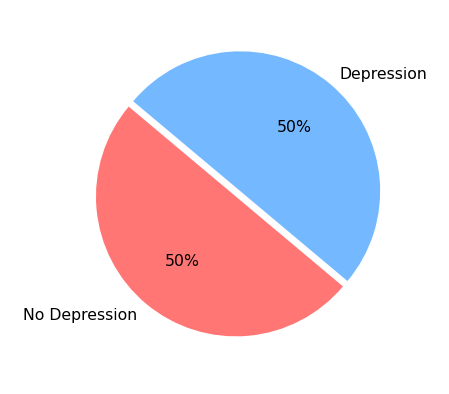

In [204]:
labels =['No Depression', 'Depression']
sizes = y_train_resampled.value_counts()
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(7, 2), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 5}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

#plt.subplot(1, 2, 2)
#sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), data=df)

plt.show()

In [205]:
forest = RandomForestClassifier() 
forest = forest.fit( X_train_resampled, y_train_resampled)

In [206]:
predictions = forest.predict(x_test) 
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.9373996789727127


XGBoost

In [ ]:
pip install --user xgboost

In [ ]:
 conda install -c conda-forge py-xgboost-cpu

In [ ]:
conda install -c conda-forge py-xgboost-gpu

In [207]:
# fit model no training data
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [208]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.65%


DECISION TREE

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
clf = DecisionTreeClassifier(random_state=500)
clf.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_pred = clf.predict(x_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9149277688603531


In [211]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_resampled, y_train_resampled)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(x_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  93.25842696629213


In [212]:
anxiety=pd.read_csv("healthanxiety_dataset.csv")
anxiety.head()
anxiety.shape

(1967, 350)

In [213]:
bipolar=pd.read_csv("bipolar_dataset.csv", sep=';')
bipolar_2 = bipolar[['subreddit','post']]
bipolar_2['subreddit'].replace('bipolarreddit', 0, inplace=True)
bipolar_2.head()
bipolar_2.shape

(1692, 2)

In [214]:
anxiety=pd.read_csv("healthanxiety_dataset.csv")
anxiety_2 = anxiety[['subreddit','post']]
anxiety_2['subreddit'].replace('healthanxiety', 1, inplace=True)
anxiety_2.head()
anxiety_2.shape

(1967, 2)

In [215]:
frames = [bipolar_2, anxiety_2]
bipolar_anxiety = pd.concat(frames)
bipolar_anxiety

,subreddit,post
0,0,What birth control are you on? I tried an IUD ...
1,0,Hypersexuality I was diagnosed with bipolar un...
2,0,Meditation I have been using the free meditati...
3,0,Family question diagnosis - vent Start with th...
4,0,Unable to stop talking to myself- any ideas/ex...
...,...,...
1962,1,I’ve been just kind of denying or ignoring thi...
1963,1,Body Pulling after waking up. I woke up this m...
1964,1,mole on my back left my mind racing link to pi...
1965,1,another health scare so about an hour ago? i w...


In [216]:
bipolar_anxiety.isna().sum()

subreddit    0
post         0
dtype: int64

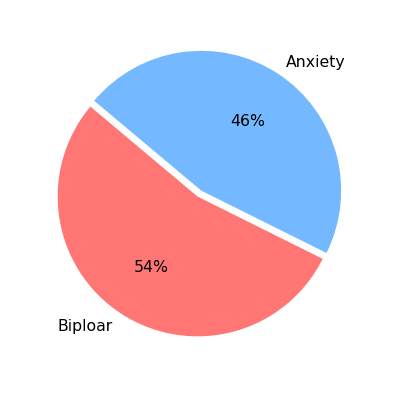

In [217]:
labels =['Biploar','Anxiety']
sizes = bipolar_anxiety.subreddit.value_counts()
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(7, 2), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 5}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

#plt.subplot(1, 2, 2)
#sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), data=df)

plt.show()

In [218]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

In [219]:
from nltk.stem import WordNetLemmatizer
# Filter rows with column
data = bipolar_anxiety.loc[bipolar_anxiety['post'].notnull(),:]

# Apply uni- and bigram vectorizer
class lemmatizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, df):
        return [self.wnl.lemmatize(word) for word in word_tokenize(df)]

vectorizer = CountVectorizer(max_features=2500, ngram_range=(1,2),
                             tokenizer=lemmatizer(), lowercase=True, stop_words='english',
                             token_pattern = r'\w+')

vectorizer.fit(data['post'])
count_vector = vectorizer.transform(data['post'])
count_vector.shape

(3659, 2500)

In [220]:
# Transform into data frame
bow = count_vector.toarray()
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
bow.head()

,!,! !,! 'm,! ),! ’,#,# x200b,$,%,&,...,’ d,’ ll,’ m,’ s,’ t,’ ve,“,”,” .,�
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


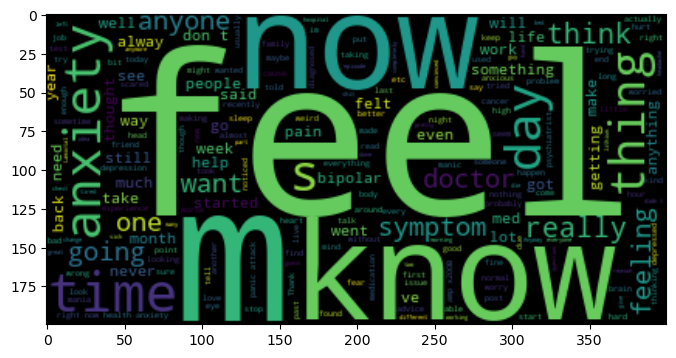

In [221]:
visual_rev = WordCloud().generate(' '.join(data['post']))
plt.figure(figsize=(8,8))
plt.imshow(visual_rev, interpolation='bilinear')
plt.show()

In [222]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

data['cleaned']=data['post'].map(lambda s:preprocess(s))


Glimpse of Anxiety WordCloud :


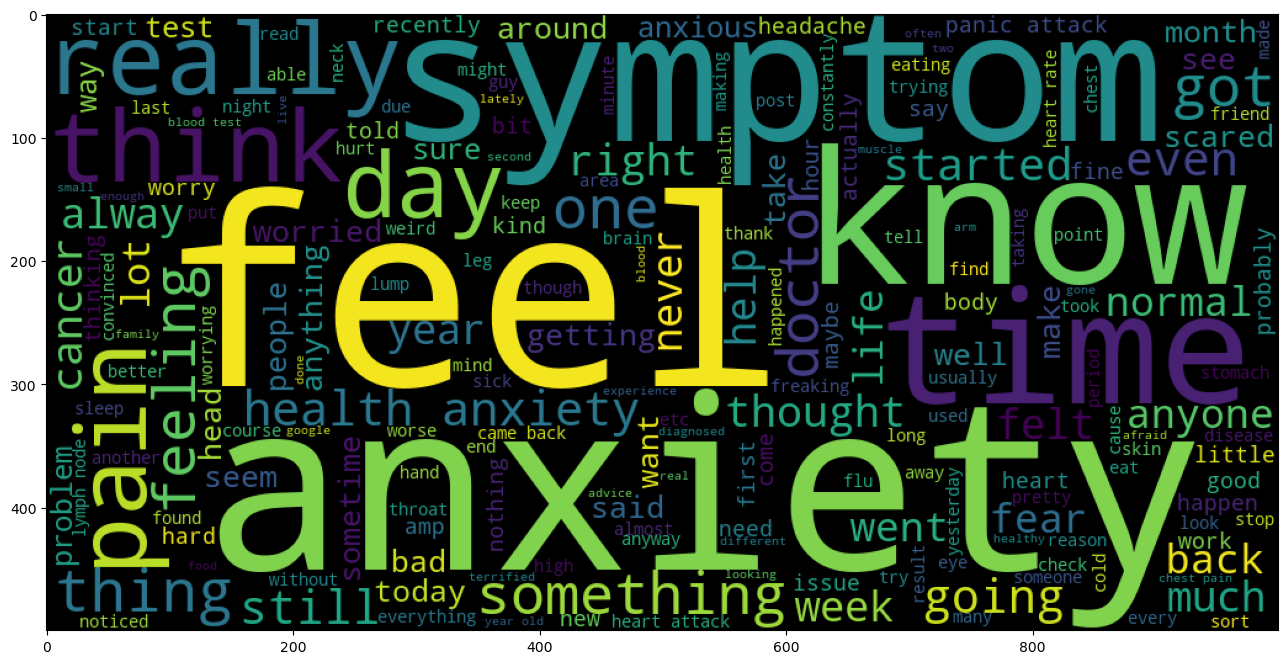

In [223]:
print(f"\nGlimpse of Anxiety WordCloud :")

from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
df2=data[data['subreddit']==1]
for row in df2['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)


Glimpse of Bipolar WordCloud :


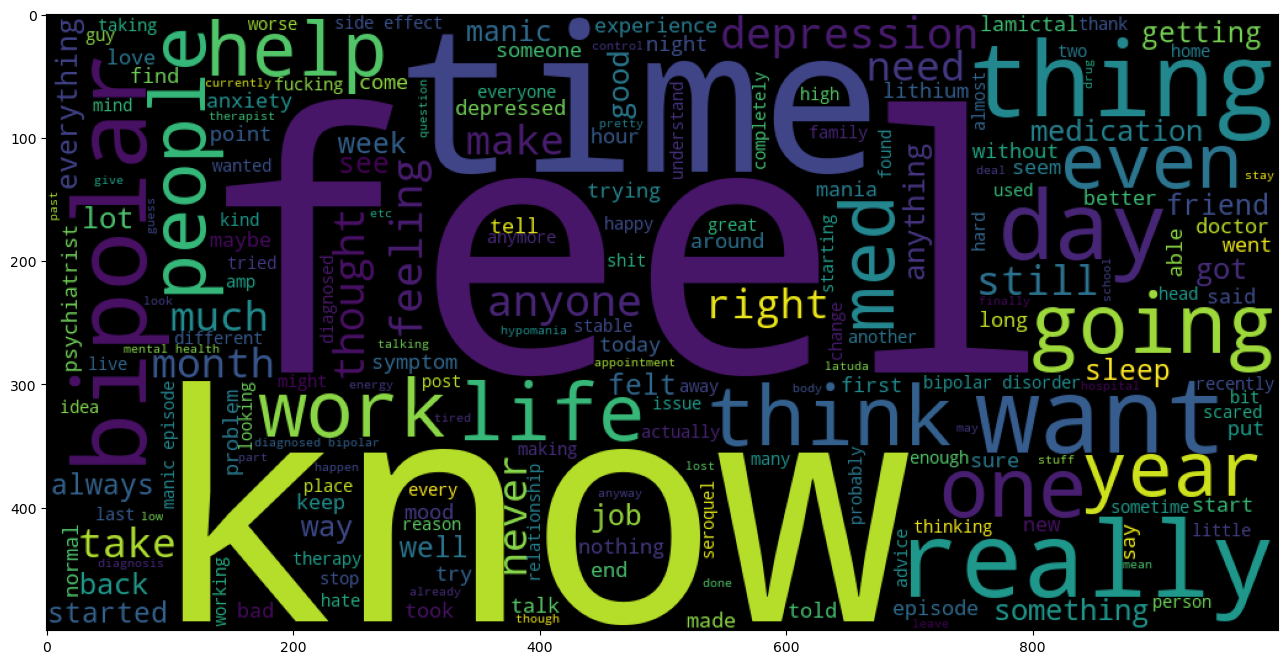

In [224]:
print(f"\nGlimpse of Bipolar WordCloud :")

from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
df2=data[data['subreddit']==0]
for row in df2['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [225]:
vectorizer_1 = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english',max_features=2500)
# tokenize and build vocab
vectorizer_1.fit(data['cleaned'])
# summarize
vocab_2 = vectorizer_1.vocabulary_
data_vec_1 = vectorizer_1.transform(data['cleaned'])
data_vec_1=data_vec_1.toarray()
data_vec_1.shape

(3659, 2500)

In [226]:
# tfidf_tokens = tfidfvectorizer.get_feature_names_out()
# df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index=[]columns = tfidf_tokens)
# print("\nTD-IDF Vectorizer\n")
# print(df_tfidfvect)

#bow1 = data_vec_1.toarray()
bow1 = pd.DataFrame(bow, columns=vectorizer_1.get_feature_names_out())
bow1.head()

,abdomen,abdominal,abdominal pain,abilify,ability,able,abnormal,absolute,absolutely,abuse,...,yes,yesterday,young,younger,youtube,yrs,zero,zoloft,zombie,zyprexa
0,0,0,0,0,0,0,0,0,1,NaN,...,0,0,0,0,NaN,NaN,0,0,NaN,0
1,0,0,0,0,0,0,0,0,0,NaN,...,0,0,1,0,NaN,NaN,0,0,NaN,0
2,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,NaN,NaN,0,0,NaN,0
3,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,NaN,NaN,0,0,NaN,0
4,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,NaN,NaN,0,0,NaN,0


In [227]:
from sklearn.metrics.pairwise import cosine_similarity

bow2=cosine_similarity(data_vec_1, data_vec_1)
data_vec=np.hstack((bow1,bow2))
data_vec

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05056308],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01827821,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01773521, 0.        ,
        0.06260412],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.0527263 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0527263 , 1.        ,
        0.03320622],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03320622,
        1.        ]])

In [228]:
data_vec_1.shape

(3659, 2500)

In [229]:
data['subreddit'].value_counts()

1    1967
0    1692
Name: subreddit, dtype: int64

In [230]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_vec_1, data['subreddit'], test_size = 0.25, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)

print(test_score)

0.9475409836065574


In [231]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(x_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  93.66120218579235


In [232]:
import xgboost as xgb
# Train the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1)
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 93.22%


In [233]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(x_train, y_train)

In [234]:
predictions = forest.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.9420765027322404


In [235]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=500)
clf.fit(x_train, y_train)
# Make predictions
y_pred = clf.predict(x_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8448087431693989


In [236]:
depression=X
depression_label=Y
disorder=data_vec_1
disorder_label=data['subreddit']

In [237]:
# Random Forest on depression dataset
smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(depression, depression_label)
model_1 = XGBClassifier()
model_1=model_1.fit(X_resampled, Y_resampled)

In [238]:
# SVM on disorder dataset
#SVM_2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
#SVM_2.fit(disorder,disorder_label)
clf_2 = MultinomialNB()
clf_2.fit(disorder,disorder_label)

MultinomialNB()

In [239]:
df6=pd.read_csv("therapist.csv")
df6.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [240]:
df6.Response=df6.Response.astype(str)
def convert_lowercase(text):
    text = text.lower()
    return text

df6['Response'] = df6['Response'].apply(convert_lowercase)

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df6['Response'] = df6['Response'].apply(remove_url)

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df6['Response'] = df6['Response'].apply(remove_punc)

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df6['Response'] = df6['Response'].apply(remove_stopwords)

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df6['Response'] = df6['Response'].apply(perform_stemming)

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

df6['cleaned_response']=df6['Response'].map(lambda s:preprocess(s))


In [241]:
vectorizer_depression = TfidfVectorizer(vocabulary=vocab)
vectorizer_depression.fit(df6['cleaned_response'])
vector5 = vectorizer_depression.transform(df6['cleaned_response'])

In [242]:
depression_pred = forest.predict(vector5) 
depression_pred=depression_pred.reshape(3512,1)
depression_pred.shape

(3512, 1)

In [243]:
vectorizer_disorder = TfidfVectorizer(vocabulary=vocab_2)
vectorizer_disorder.fit(df6['cleaned_response'])
vector6 = vectorizer_disorder.transform(df6['cleaned_response'])

In [244]:
disorder_pred = clf_2.predict(vector6)
disorder_pred=disorder_pred.reshape(3512,1)
disorder_pred.shape

(3512, 1)

In [245]:
patient=df6['cleaned_response'].to_numpy()
patient=patient.reshape(3512,1)
final=np.hstack((patient,disorder_pred))

In [246]:
output=np.hstack((final,depression_pred))
output.shape

(3512, 3)

In [247]:
column_values = ['Patient', 'Disorder','Depression'] 
predictions= pd.DataFrame(output,columns = column_values)


In [269]:
df3=predictions[predictions['Disorder']==0].head()
df3.to_csv('mental.csv', index=False)

In [248]:
predictions.head()

,Patient,Disorder,Depression
0,everyon think worthless mayb need find new peo...,0,0
1,hello thank question seek advic feel worthless...,0,1
2,first thing suggest get sleep need impact thin...,0,0
3,therapi essenti feel depress worthless work ex...,0,0
4,first want let know alon feel alway someon hel...,0,1


In [249]:
predictions['Disorder'].value_counts()

0    3219
1     293
Name: Disorder, dtype: int64

In [250]:
predictions['Depression'].value_counts()

1    1767
0    1745
Name: Depression, dtype: int64

In [251]:
df_o=predictions[['Depression','Disorder']]
df_o['Depression'].replace(1, 'Depression', inplace=True)
df_o['Depression'].replace(0, 'No Depression', inplace=True)
df_o['Disorder'].replace(1, 'Anxiety', inplace=True)
df_o['Disorder'].replace(0, 'Bipolar', inplace=True)
df_o.head()

,Depression,Disorder
0,No Depression,Bipolar
1,Depression,Bipolar
2,No Depression,Bipolar
3,No Depression,Bipolar
4,Depression,Bipolar


In [252]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
#confusion_matrix = metrics.confusion_matrix(df_o['Disorder'], df_o['Depression'])
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Disorder', 'Depression'])
#cm_display.plot()
#plt.show()
#df_o=predictions[['Depression','Disorder']]
#hm = sns.heatmap(data=df_o)
#plt.show()
predictions['Disorder'].value_counts()

0    3219
1     293
Name: Disorder, dtype: int64

In [258]:
predictions['Depression'].value_counts()

1    1767
0    1745
Name: Depression, dtype: int64

In [253]:
count_both = df_o[(df_o['Depression'] == 'Depression') & (df_o['Disorder'] == 'Anxiety')].shape[0]
count_both

184

In [254]:
count_both = df_o[(df_o['Depression'] == 'Depression') & (df_o['Disorder'] == 'Bipolar')].shape[0]
count_both

1583

In [255]:
count_both = df_o[(df_o['Depression'] == 'No Depression') & (df_o['Disorder'] == 'Bipolar')].shape[0]
count_both

1636

In [256]:
count_both = df_o[(df_o['Depression'] == 'No Depression') & (df_o['Disorder'] == 'Anxiety')].shape[0]
count_both

109